---
# "M1 Applied Data Science and Machine Learning"
> "M1 Assignment: predicting survivors from the Titanic dataset "

- toc:true- branch: master
- badges: true
- comments: true
- author: Robin Færaas
- categories: [EDA, SML]

---

In [ ]:
#importing the libraries used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

This Project was used for M1, introduction to machine learning and EDA. The data set is the Titanic survival dataset, a popular competition dataset on kaggle.   

# 1. Data Preparation

The goal here is to get an understadning of the data and and prepare it for further analysis, some important steps is to make the data cleaner by, removing missing values, outliers, type of variables etc  

In [ ]:
df_train = pd.read_csv("/work/train.csv")
df_test = pd.read_csv("/work/test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
df_train.describe()
#df_test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Under there is a corrlation matrix and this will show correlation between the different variables. if there is a 100% positive linear correlation or negative correlation.

<AxesSubplot:>

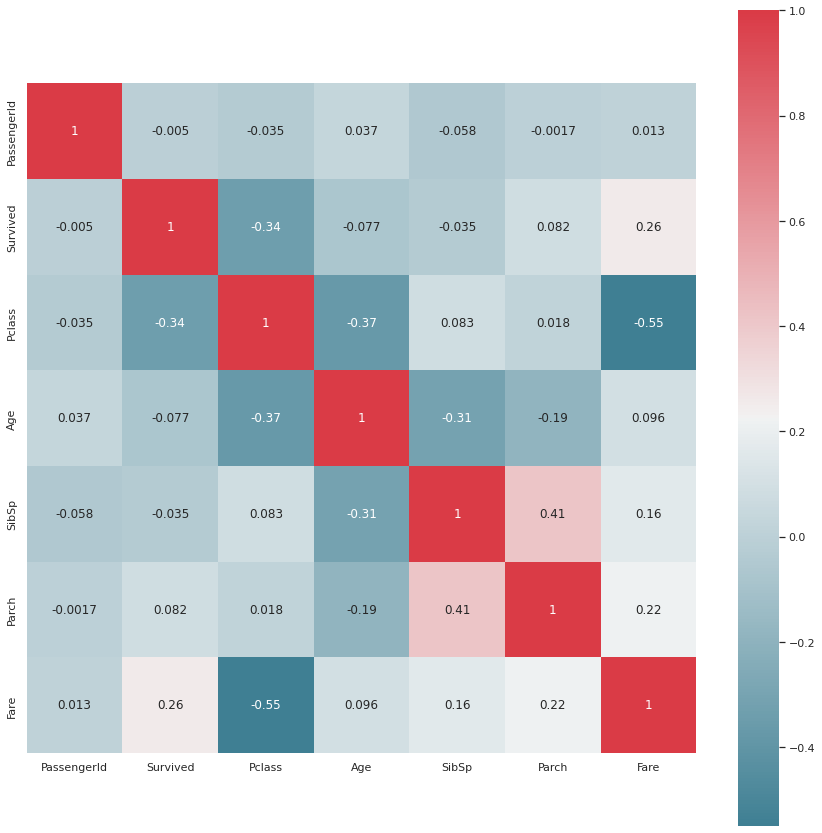

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax, annot = True)

From the fata preparation there are not som many variables correlated, we have some missing values in age and ticket. 

In the EDA (exploritory data analysis) we take a deeper dive into to the variables and try to make some useful plots/ graphs.

# 2. EDA 

Looking into the dataset

In [ ]:
df_train2 = df_train.copy()

df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

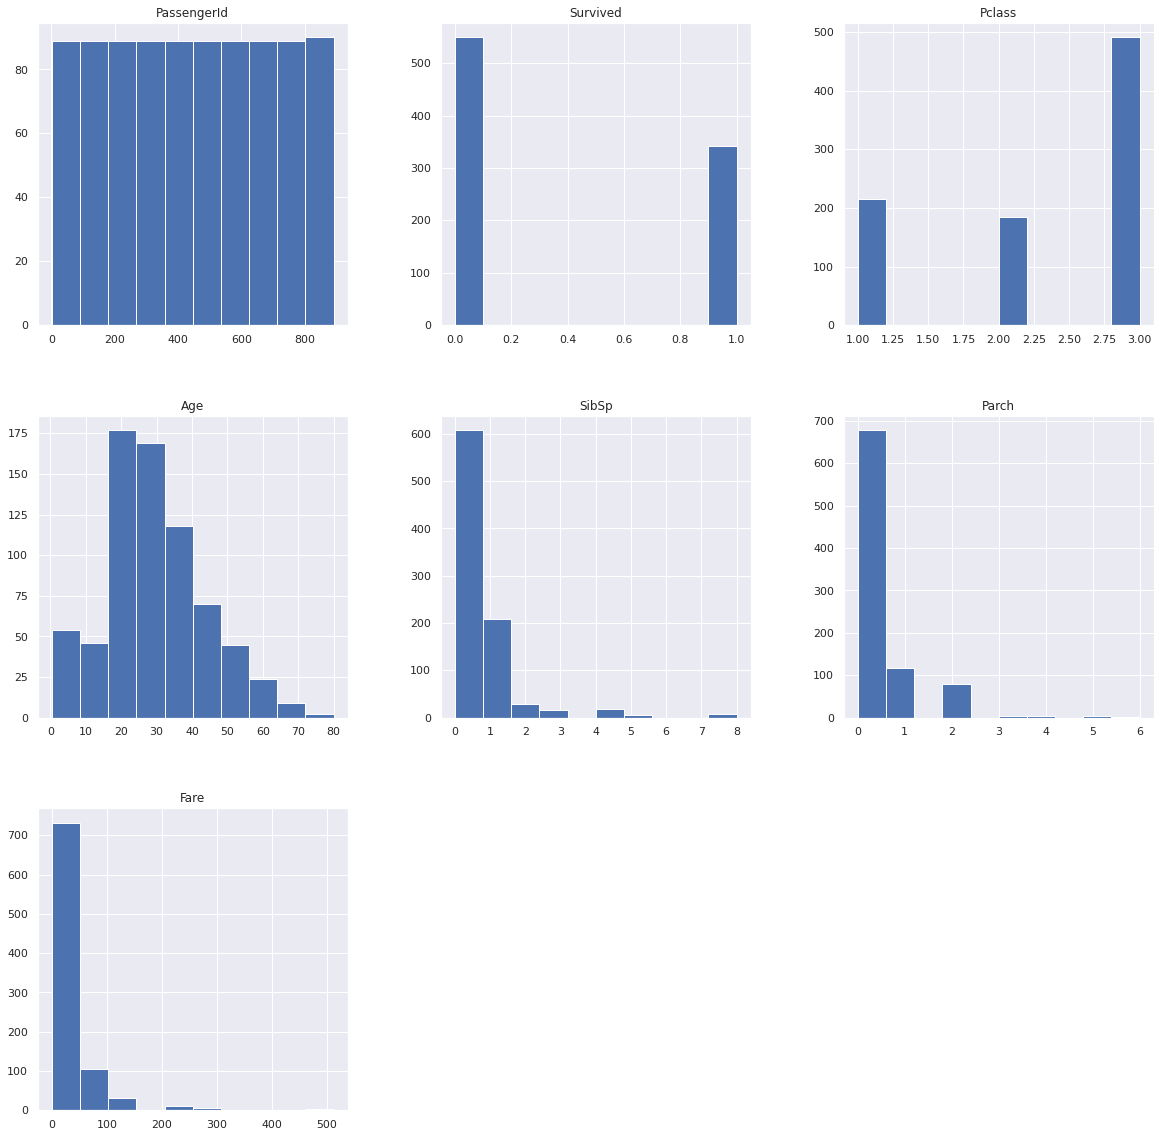

In [ ]:
df_train.hist(figsize=(20,20))
plt.show()

In [ ]:
df_train.Survived.sum()/df_train.Survived.count()

0.3838383838383838

0    549
1    342
Name: Survived, dtype: int64

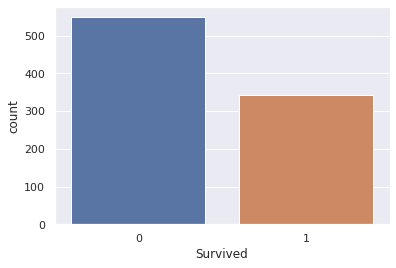

In [ ]:

sns.countplot(x='Survived', data=df_train)
df_train['Survived'].value_counts()


In [ ]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

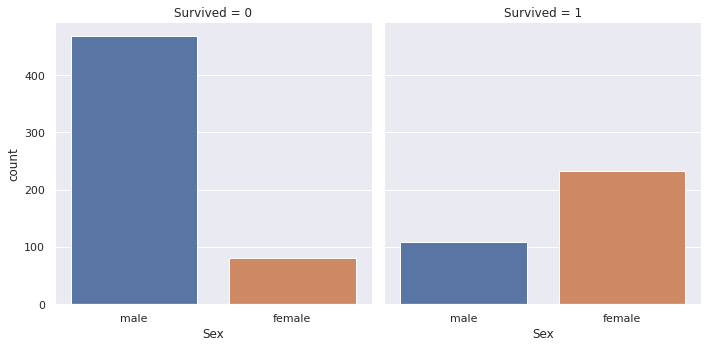

In [ ]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

In [ ]:
print("% of women survived: " , df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


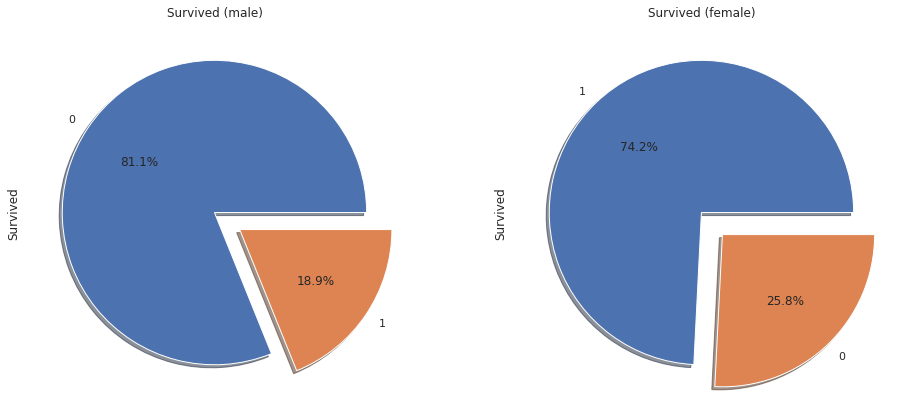

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

In [ ]:
cm_surv = ["darkgrey" , "lightgreen"]

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


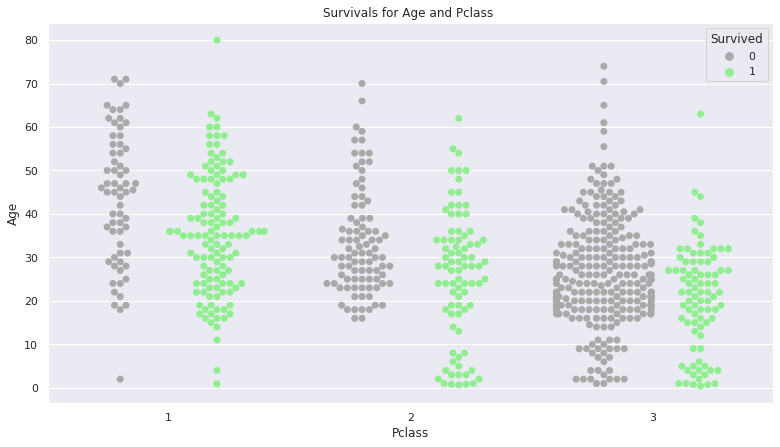

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=df_train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

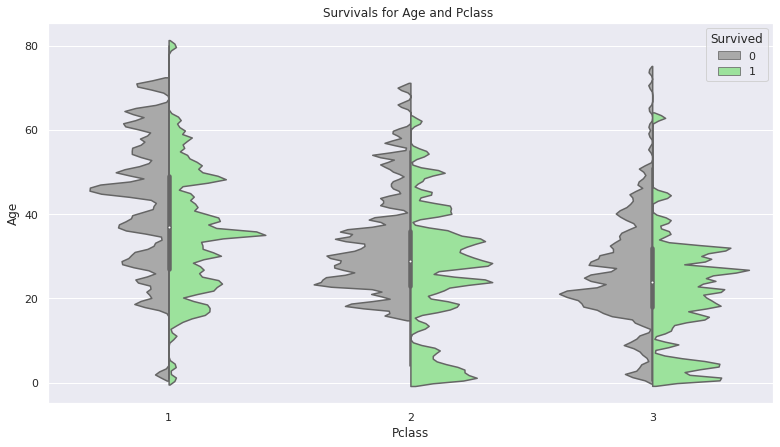

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df_train, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

In [ ]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


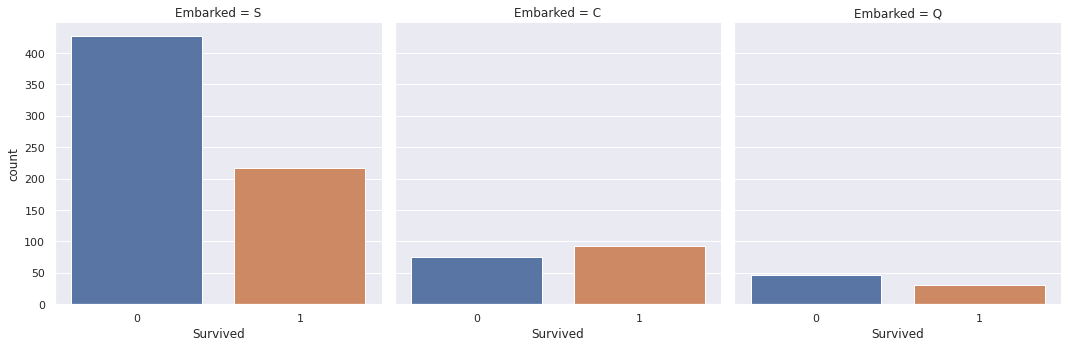

In [ ]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train);

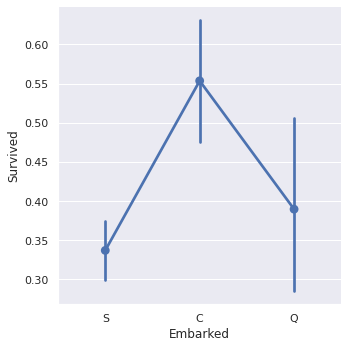

In [ ]:
sns.catplot('Embarked','Survived', kind='point', data=df_train);

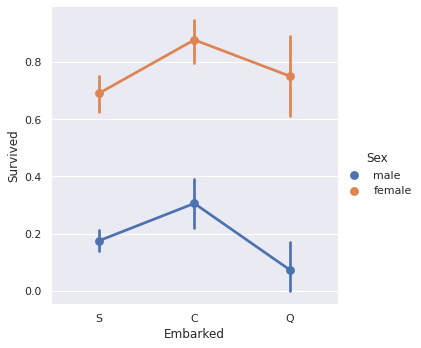

In [ ]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df_train);

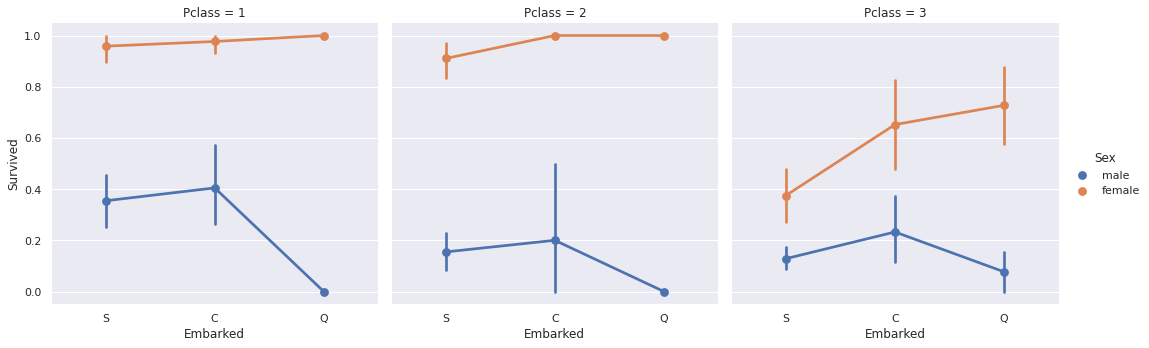

In [ ]:
sns.catplot('Embarked','Survived', col='Pclass', hue= 'Sex', kind='point', data=df_train);

In [ ]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

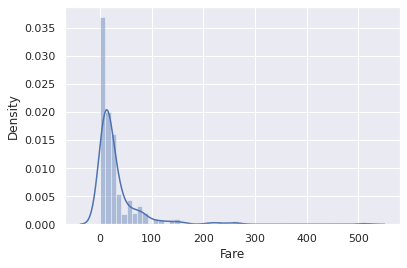

In [ ]:
sns.distplot(df_train['Fare']);

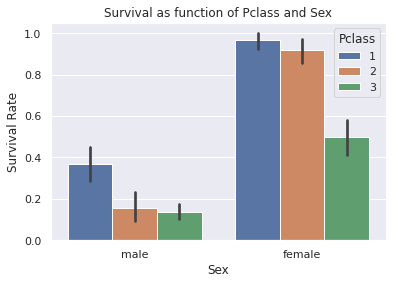

In [ ]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

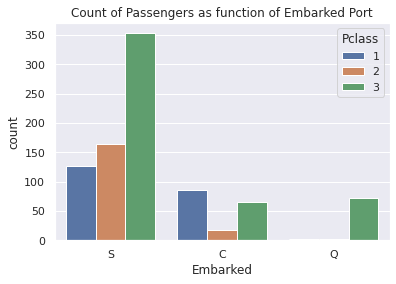

In [ ]:
sns.countplot(x='Embarked', hue='Pclass', data=df_train)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

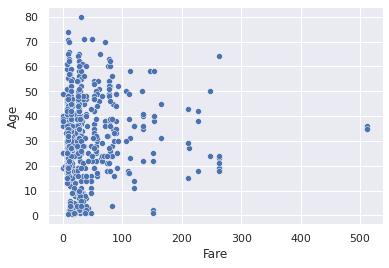

In [ ]:
sns.scatterplot(data=df_train, x="Fare", y="Age")

# 3. Wrangelig the data 

In [ ]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()
# Drop useless columns
train = df_train.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [ ]:
## Dealing with mising values ##
freq = train.Embarked.dropna().mode()
print(freq,'\n')
train['Embarked'] = train['Embarked'].fillna(freq[0]) # fill "NAN" values with the most frequent value

mean = train['Age'].dropna().mean()
train['Age'] = train['Age'].fillna(round(mean))
print(round(mean))

0    S
dtype: object 

30


In [ ]:
train['Sex'].replace('female', 0,inplace=True)
train['Sex'].replace('male', 1,inplace=True)


train['Embarked'].replace('S', 0,inplace=True)
train['Embarked'].replace('C', 1,inplace=True)
train['Embarked'].replace('Q', 2,inplace=True)

In [ ]:
# Drop useless columns
test = df_test.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)


## Dealing with mising values ##
freq = test.Fare.dropna().mode()
print(freq,'\n')
test['Fare'] = test['Fare'].fillna(freq[0]) # fill "NAN" values with the most frequent value

mean = test['Age'].dropna().mean()
test['Age'] = test['Age'].fillna(round(mean))
print(round(mean))

0    7.75
dtype: float64 

30


In [ ]:


test['Sex'].replace('female', 0,inplace=True)
test['Sex'].replace('male', 1,inplace=True)


test['Embarked'].replace('S', 0,inplace=True)
test['Embarked'].replace('C', 1,inplace=True)
test['Embarked'].replace('Q', 2,inplace=True)



In [ ]:


test.sample(5)



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
38,3,1,25.0,0,0,9.5000,0
179,1,0,64.0,0,2,83.1583,1
45,3,1,25.0,0,0,7.9250,0
348,2,1,24.0,0,0,13.5000,0
408,3,0,30.0,0,0,7.7208,2


In [ ]:


x_test =test
x_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

#y_test = test['Survived']

In [ ]:
#y_test = test['Survived']

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)

(418, 7)
(891, 7)
(891,)


In [ ]:
# Drop useless columns
train = df_train.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)

In [ ]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,0
3,1,0,35.0,1,0,53.1000,0
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,0
888,3,0,30.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

making models on baseline algoritms

In [ ]:
LogReg= LogisticRegression(solver='liblinear')
LogReg.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
KNN =KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
LogReg = round(LogReg.score(x_train, y_train) * 100, 2)
RF = round(RF.score(x_train, y_train) * 100, 2)
KNN = round(KNN.score(x_train, y_train) * 100, 2)
NB = round(NB.score(x_train, y_train) * 100, 2)

In [ ]:
#dict = {'Model' : ['Logistic Regression'],
#'Score' :[score1] }
#models_score = pd.DataFrame(dict)

#'K nearest neighbor','Naive Bayes','Support Vector Machine'
dict = {'Model' : ['Logistic Regression','Random Forest','K nearest neighbor','Naive Bayes'],
'Score' :[LogReg,RF,KNN,NB] }
models_score = pd.DataFrame(dict)

In [ ]:
models_score

,Model,Score
0,Logistic Regression,80.36
1,Random Forest,97.98
2,K nearest neighbor,80.47
3,Naive Bayes,79.24


# 4. Machine Learning 

In [ ]:


#df_train_ml = df_train.copy()
#df_test_ml = df_test.copy()



In [ ]:
df_train_ml

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_test_ml

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:


df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)



In [ ]:
df_test_ml

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin'],axis=1,inplace=True)

In [ ]:
df_train_ml.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1


In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)

In [ ]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

In [ ]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print("*")

*


In [ ]:


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[105  18]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       123
           1       0.78      0.70      0.74        92

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.79      0.79      0.78       215

0.786046511627907
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Part 2: Data wrangling

building two new dataframes df_train_ml and df_test_ml
these will have only ordinal features and no missing values so they can be used for ML algorithms
converting categorical to numerical by pd.get_dummies
dropping all features that seem to be not useful for prediction
Then use the Standard scaler and apply train/test split


In [ ]:
logreg.fit(X_train_all, y_train_all)
pred_all_logreg = logreg.predict(X_test_all)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[107  16]
 [ 36  56]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       123
           1       0.78      0.61      0.68        92

    accuracy                           0.76       215
   macro avg       0.76      0.74      0.74       215
weighted avg       0.76      0.76      0.75       215

0.7581395348837209


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_sc,y_train_sc)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[71 52]
 [26 66]]
              precision    recall  f1-score   support

           0       0.73      0.58      0.65       123
           1       0.56      0.72      0.63        92

    accuracy                           0.64       215
   macro avg       0.65      0.65      0.64       215
weighted avg       0.66      0.64      0.64       215

0.6372093023255814


In [ ]:
knn.fit(X_train_all, y_train_all)
pred_all_knn = knn.predict(X_test_all)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

In [ ]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[116   7]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       123
           1       0.89      0.63      0.74        92

    accuracy                           0.81       215
   macro avg       0.83      0.79      0.79       215
weighted avg       0.82      0.81      0.80       215

0.8093023255813954


In [ ]:
rfc.fit(X_train_all, y_train_all)
pred_all_rfc = rfc.predict(X_test_all)

In [ ]:


from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, y_train_sc)



SVC(C=100, gamma=0.01)

In [ ]:


pred_svc = svc.predict(X_test_sc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))



[[116   7]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       123
           1       0.89      0.63      0.74        92

    accuracy                           0.81       215
   macro avg       0.83      0.79      0.79       215
weighted avg       0.82      0.81      0.80       215

0.8093023255813954


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_rfc = cross_val_score(rfc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.77777778 0.76388889 0.73611111 0.91666667 0.81690141 0.87323944
 0.8028169  0.73239437 0.87323944 0.85915493]
0.8152190923317683


In [ ]:
scores_svc = cross_val_score(svc, X_train_all_sc, y_train_all_sc, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81944444 0.80555556 0.76388889 0.875      0.81690141 0.8028169
 0.8028169  0.73239437 0.88732394 0.84507042]
0.8151212832550861


In [ ]:
#print("dtree_2 : " , scores_dtree_2.mean())
print("rfc     : " , scores_rfc.mean())
print("svc     : " , scores_svc.mean())

rfc     :  0.8152190923317683
svc     :  0.8151212832550861


In [ ]:


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform



In [ ]:


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6], 'max_features': [6,7,8],  
              'min_samples_split': [5, 6, 8]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train_sc,y_train_sc)
#sc_rf = get_best_score(rf_grid)
rf_grid.best_params_
#rf_grid.fit(X_test_all_sc, y_train)


Fitting 10 folds for each of 27 candidates, totalling 270 fits


{'max_depth': 6, 'max_features': 6, 'min_samples_split': 6}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

<BarContainer object of 9 artists>

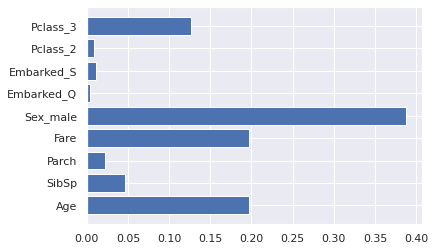

In [ ]:
plt.barh(df_test_ml.columns, rfc.feature_importances_)


In [ ]:
# deleete this 

In [ ]:
X_train_all

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0,0,1
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,0


In [ ]:
y_train_all

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,39.0,0,5,29.1250,0,1,0,0,1
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,0


# End Notebook
---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b048325a-8a20-4a84-a12b-a1cbf86f9889' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>